## Select the Right Threshold values using ROC Curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In /Users/snehalgunde/opt/anaconda3/envs/tf/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/snehalgunde/opt/anaconda3/envs/tf/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/snehalgunde/opt/anaconda3/envs/tf/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/snehalgunde/opt/anaconda3/envs/tf/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor rele

In [2]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [3]:
X.shape

(2000, 20)

In [4]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Apply RandomForestClassifier

In [7]:

from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9822833333333333


In [8]:
ytrain_pred

array([[1.  , 0.  ],
       [0.98, 0.02],
       [0.02, 0.98],
       ...,
       [0.98, 0.02],
       [0.99, 0.01],
       [0.24, 0.76]])

# Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


# Adaboost Classifier

In [11]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


# KNNClassifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


### Now we will focus on selecting the best threshold for maximum accuracy

In [13]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9849000000000001


In [14]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.99,0.991861,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.98,0.966929,0.538202,0.8
3,0.97,0.761539,0.509875,0.8
4,0.67,0.779443,0.490344,0.4
...,...,...,...,...
595,0.01,0.024239,0.461121,0.0
596,0.02,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.01,0.001147,0.441720,0.2


In [15]:
final_prediction

0      0.885262
1      0.115823
2      0.821283
3      0.760353
4      0.584947
         ...   
595    0.123840
596    0.115345
597    0.879197
598    0.163217
599    0.834857
Length: 600, dtype: float64

#### Calculate the ROc Curve



In [16]:

fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.9134413 , 0.9134413 , 0.91156694, 0.91077475, 0.80790031,
       0.80662833, 0.80333537, 0.8030558 , 0.78630736, 0.78571156,
       0.76132008, 0.76037124, 0.72499037, 0.72387362, 0.71595844,
       0.70893711, 0.64707293, 0.64243537, 0.6015152 , 0.59614346,
       0.58494674, 0.58050386, 0.56042732, 0.55719563, 0.55105932,
       0.53389283, 0.53365858, 0.48866892, 0.45700602, 0.44794916,
       0.4446034 , 0.38964628, 0.38379719, 0.36245613, 0.35086612,
       0.23583728, 0.23390421, 0.22698424, 0.22646893, 0.20142339,
       0.19848417, 0.12062642, 0.1203351 , 0.10632697])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
29,0.447949,0.961667
30,0.444603,0.960000
28,0.457006,0.960000
23,0.557196,0.960000
22,0.560427,0.958333


In [18]:
accuracy_ls

,thresholds,accuracy
29,0.447949,0.961667
30,0.444603,0.960000
28,0.457006,0.960000
23,0.557196,0.960000
22,0.560427,0.958333
27,0.488669,0.958333
25,0.533893,0.958333
24,0.551059,0.958333
26,0.533659,0.956667
18,0.601515,0.946667


In [19]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

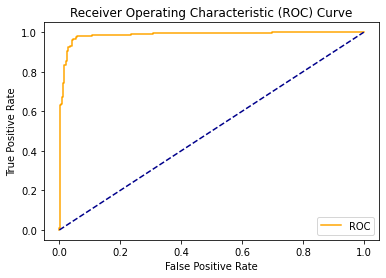

In [20]:
plot_roc_curve(fpr,tpr)